In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

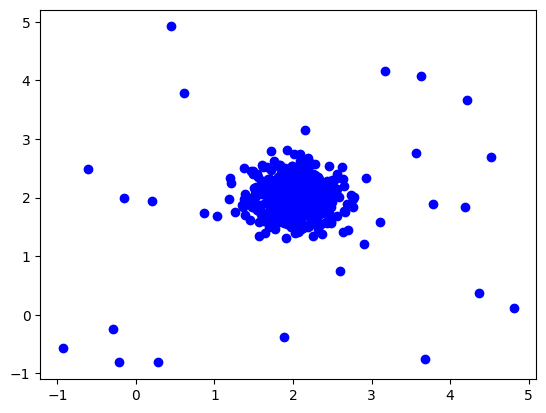

In [2]:
def make_blob_dataset(n_samples, contamination=0.05, random_state=42):
    rng = np.random.RandomState(random_state)
    X_inliers = 0.3 * rng.normal(size=(int(n_samples * (1. - contamination)), 2)) + 2
    X_outliers = rng.uniform(low=-1, high=5, size=(int(n_samples * contamination), 2))
    X = np.concatenate((X_inliers, X_outliers), axis=0)
    rng.shuffle(X)
    return X

X = make_blob_dataset(500)
plt.scatter(X[:, 0], X[:, 1], color='b');

In [3]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)


In [4]:
decision, y_pred = ocsvm.fit(X)

In [5]:
decision

array([ 2.61754018e-02,  7.66308758e-03, -8.89232639e-03,  2.94009003e-02,
        7.94768800e-03,  3.83000753e-02,  4.02913796e-03,  3.49452439e-02,
        4.61929230e-02,  3.99488603e-02,  1.12218938e-02,  2.29438835e-02,
       -1.35851435e-02,  3.54457457e-02,  2.76403985e-02,  3.42031305e-02,
        4.26730950e-02,  1.61341073e-02,  3.75857843e-02,  3.94318619e-02,
        4.65571270e-02,  3.63753810e-02,  7.22129424e-03,  4.23503837e-02,
        3.43426723e-02,  3.57323286e-02,  4.59020807e-02,  3.74430358e-02,
        4.37357081e-02,  4.14414972e-02,  3.92350928e-02,  4.43643943e-02,
        3.06566879e-02,  4.53808917e-02,  4.39290649e-02,  4.15358721e-02,
        2.18444984e-02,  3.74995514e-02, -1.55550367e-02, -1.23619812e-08,
        6.93054283e-03,  3.72529058e-02,  4.44700412e-02,  3.63195397e-02,
        3.21923595e-02,  2.85478342e-02,  1.08626439e-03,  2.54661515e-02,
        2.87932922e-02,  4.47540412e-02,  3.77043315e-02,  1.34527193e-02,
        4.51031281e-02,  

In [6]:
x_data = torch.tensor(X)

In [7]:
classifier = OneClassSVMClassifier(x_data, nu=0.5, gamma=0.8, num_inducing_points=100)

In [8]:
classifier.fit()

(array([ 1.63569063e-02,  3.66975888e-02, -2.54830970e-01, -2.70528972e-08,
        -2.76635173e-01,  4.51125384e-02, -2.53388323e-01, -2.65873127e-01,
        -2.26902622e-01,  1.97015026e-02,  6.15900677e-03, -1.75549917e-01,
         3.42195116e-02, -2.77601183e-01,  2.05605184e-02,  2.65166225e-02,
        -1.18733387e-02, -2.50843572e-01, -8.11815422e-08, -1.72640604e-01,
        -2.92448066e-01, -2.87445989e-01, -3.14021736e-02,  4.07001072e-02,
         3.86325421e-02, -1.04214922e-02,  3.68586307e-02, -2.68134214e-01,
        -3.03343173e-02, -1.00519296e-03, -1.51290072e-01,  1.03136160e-02,
         2.45576173e-02, -2.66204441e-01, -2.55615831e-01, -8.31025753e-02,
         4.07807355e-02, -2.57175172e-01, -6.04580932e-03,  3.16874815e-02,
        -2.63140321e-01, -9.69926335e-02,  2.18462048e-02, -3.91724390e-02,
        -2.64449412e-01,  4.52606036e-02,  3.24186707e-02, -2.56170522e-01,
        -4.18622348e-02, -2.27526067e-03, -1.85986150e-02, -1.11098245e-01,
        -8.6

In [9]:
decision, y_pred = classifier.decision()

In [10]:
decision

array([ 1.63569063e-02,  3.66975888e-02, -2.54830970e-01, -2.70528972e-08,
       -2.76635173e-01,  4.51125384e-02, -2.53388323e-01, -2.65873127e-01,
       -2.26902622e-01,  1.97015026e-02,  6.15900677e-03, -1.75549917e-01,
        3.42195116e-02, -2.77601183e-01,  2.05605184e-02,  2.65166225e-02,
       -1.18733387e-02, -2.50843572e-01, -8.11815422e-08, -1.72640604e-01,
       -2.92448066e-01, -2.87445989e-01, -3.14021736e-02,  4.07001072e-02,
        3.86325421e-02, -1.04214922e-02,  3.68586307e-02, -2.68134214e-01,
       -3.03343173e-02, -1.00519296e-03, -1.51290072e-01,  1.03136160e-02,
        2.45576173e-02, -2.66204441e-01, -2.55615831e-01, -8.31025753e-02,
        4.07807355e-02, -2.57175172e-01, -6.04580932e-03,  3.16874815e-02,
       -2.63140321e-01, -9.69926335e-02,  2.18462048e-02, -3.91724390e-02,
       -2.64449412e-01,  4.52606036e-02,  3.24186707e-02, -2.56170522e-01,
       -4.18622348e-02, -2.27526067e-03, -1.85986150e-02, -1.11098245e-01,
       -8.63924957e-03,  

In [11]:
y_pred

array([ 1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.])

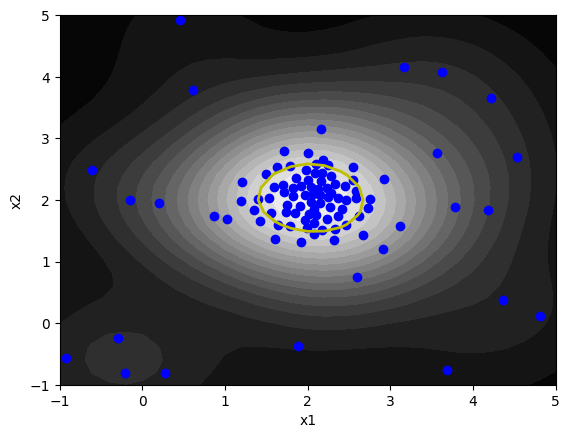

In [12]:
classifier.plot()

In [13]:
# create object of ocsvmshap
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP

In [14]:
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [15]:
x_data.shape
2**x_data.shape[1]

4

In [16]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 307.73it/s]


TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.